# COMP 494 Final Project

**Author:** Katrina Baha, Ashley Xu

**Date:** 5/10/2022

### House Sales

#### Dataset2: https://ole.sandiego.edu/bbcswebdav/pid-2961030-dt-content-rid-43616523_1/xid-43616523_1


The House Sales dataset contains details of house sales in neighborhoods of King Country, Washington. It includes data for houses sold between May 2014 and May 2015.


### Final Project Requirements:  
There are four sections of the final project. You are expected to perform the following tasks within each section to fulfill the project requirements. 
- **Data Importing and Pre-processing (50 Points)**
    - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
    - Clean, wrangle, and handle missing data
    - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
    - Reduce redundant data and perform need based discretization
- **Data Analysis and Visualization (50 Points)**
    - Identify categorical, ordinal, and numerical variables within data
    - Provide measures of centrality and distribution with visualizations
    - Diagnose for correlations between variables and determine independent and dependent variables
    - Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest
- **Data Analytics (50 Points)**
    - Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
    - Train, test, and provide accuracy and evaluation metrics for model results
- **Presentation (50 Points)**
    - In a 5 to 10 minute presentation, briefly explain the project workflow from the code and results in your markdown notebook State your findings from the data and provide the interpretation of results from your analysis at each stage in the project

## Table of Contents:
* [Data Importing and Pre-processing](#data-importing)
* [Data Analysis and Visualization](#data-vis)
* [Data Analytics](#data-analytics)

## Data Importing and Pre-processing <a class="anchor" id="data-importing"></a>

In [2]:
#import libraries needed
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm, skew, probplot
from scipy.special import boxcox1p
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#read in file
houseSales_df = pd.read_csv('house_sales.csv')

In [4]:
#check number of rows and columns
houseSales_df.shape

(21613, 21)

In [5]:
#count the number of categorical variables
cv_count = 0
for dtype in houseSales_df.dtypes:
    if dtype == 'object':
        cv_count = cv_count + 1

In [6]:
print('# of categorical variables:',cv_count)
print('# of contineous variables:',houseSales_df.shape[1] - cv_count - 1) #subtract and extra column as 1 column is an ID column 

# of categorical variables: 1
# of contineous variables: 19


In [40]:
houseSales_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
#check the column names
houseSales_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Handle missing data

In [42]:
#missing data
total = houseSales_df.isnull().sum().sort_values(ascending=False)
percent = (houseSales_df.isnull().sum()/houseSales_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
bedrooms,1134,0.052468
sqft_living,1110,0.051358
bathrooms,1068,0.049415
sqft_lot,1044,0.048304
id,0,0.000000
sqft_basement,0,0.000000
sqft_living15,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000


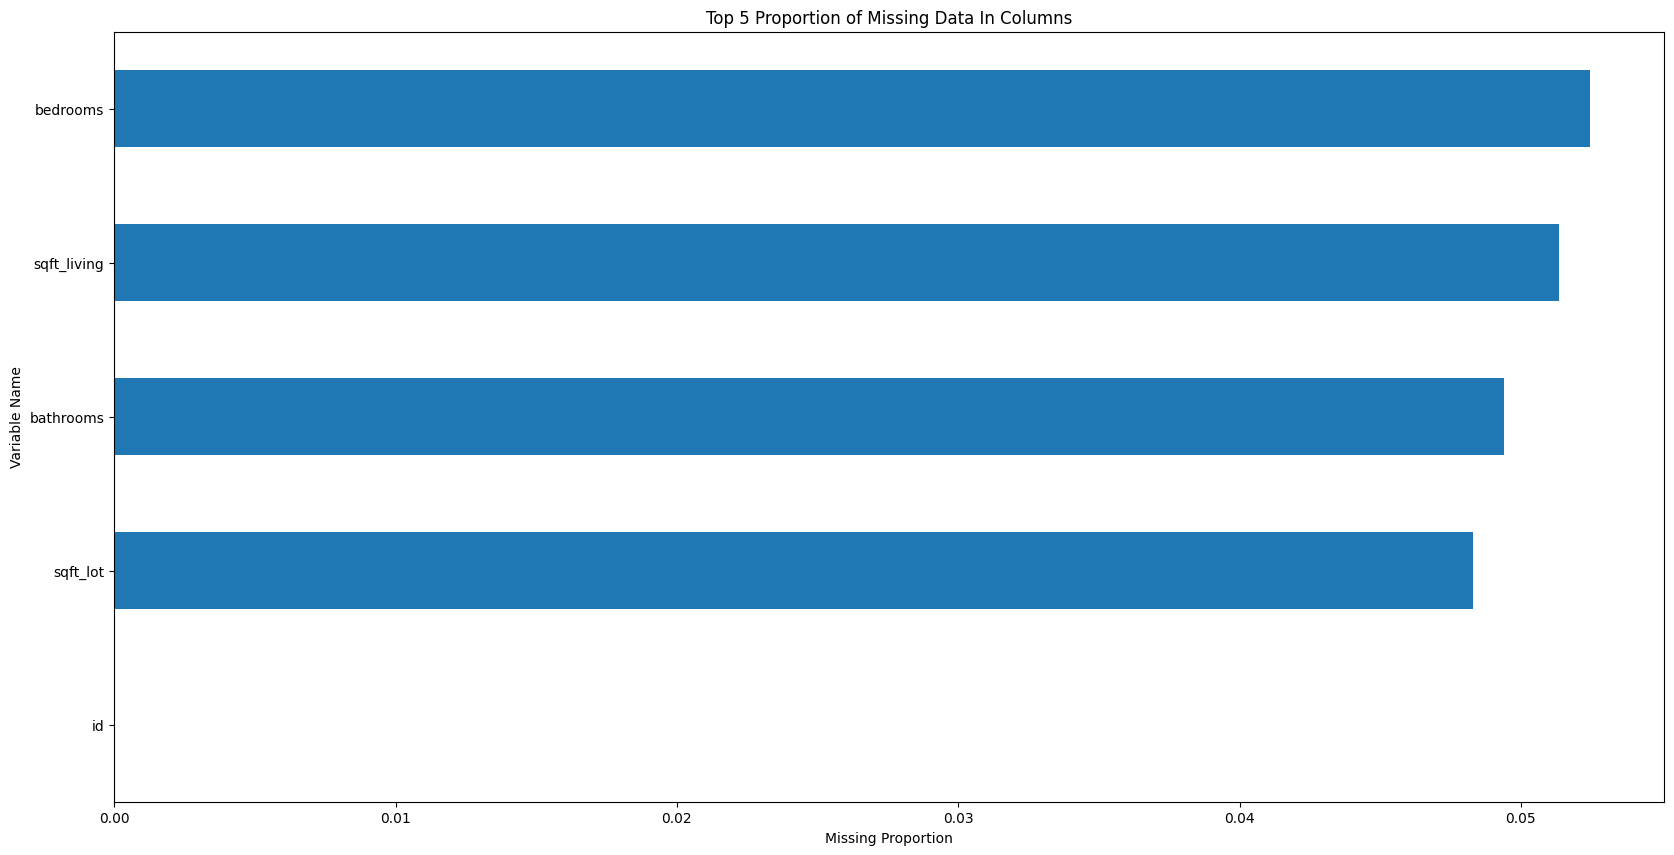

In [43]:
missing_data['Percent'].head(5).plot(kind='barh', figsize = (20,10)).invert_yaxis() #top 10 missing columns
plt.xlabel("Missing Proportion")
plt.ylabel("Variable Name")
plt.title("Top 5 Proportion of Missing Data In Columns")
plt.show()

In [9]:
#dealing with missing data
#houseSales_df["bedrooms"] = houseSales_df["bedrooms"].fillna("None")
houseSales_df["sqft_living"] = houseSales_df["sqft_living"].fillna("None")
#houseSales_df["bathrooms"] = houseSales_df["bathrooms"].fillna("None")
houseSales_df["sqft_lot"] = houseSales_df["sqft_lot"].fillna("None")

In [16]:
houseSales_df["bedrooms"] = houseSales_df.groupby("zipcode")["sqft_living"].transform(lambda x: x.fillna(x.median()))


TypeError: could not convert string to float: 'None'

In [45]:
#Check remaining missing values if any 
all_data_na = (houseSales_df.isnull().sum() / len(houseSales_df)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


### Handling Outliers

#### Target Variable

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = houseSales_df['sqft_living'], y = houseSales_df['price'])
plt.ylabel('price', fontsize=13)
plt.xlabel('sqft_living', fontsize=13)
plt.show()

## Data Analysis and Visualization <a class="anchor" id="data-vis"></a>

In [48]:
from sklearn.preprocessing import LabelEncoder

Target Variable Scatterplots

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(houseSales_df[cols], size = 2.5)
plt.show()

Correlation Matrix

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = houseSales_df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Label encode categorical variables

## Data Analytics <a class="anchor" id="data-analytics"></a>

In [50]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb

ModuleNotFoundError: No module named 'xgboost'

In [49]:
train_df = houseSales_df[houseSales_df.columns.difference(['Id', 'price'])]

In [ ]:
#Validation function
n_folds = 5

def rmse_cv(model,n_folds):
    kf=KFold(n_splits=n_folds)
    rmse = np.sqrt(-cross_val_score(model, train_df, housing_df.SalePrice, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [ ]:
lr_w_int = LinearRegression()
lr_no_int = LinearRegression(fit_intercept=False)

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=10)

In [ ]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
dt = DecisionTreeRegressor(max_depth = 10)

In [ ]:
model_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=1000, learning_rate=0.01)

In [ ]:
model_lgb = lgb.LGBMRegressor(learning_rate=0.01, max_depth=5, n_estimators=1000)

#### Algotithm Results on a 5 Fold Cross Validation

In [51]:
score_linear = rmse_cv(lr_w_int,n_folds)
print("Linear Regression (w/ Intercept) score: {:.4f} ({:.4f})\n".format(score_linear.mean(), score_linear.std()))

NameError: name 'rmse_cv' is not defined

### Variable Importance Plot

Only applies to tree based models (Decision Trees, Random Forest, GBMs)

In [ ]:
model = model_xgb.fit(train_df, houseSales_df.SalePrice) #fit model on entire dataset to get variable importance since we fit it on each fold
feature_important = model.get_booster().get_score(importance_type='weight')

keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data[:20].plot(kind='barh', figsize = (20,10)).invert_yaxis(); ## plot top 20 features
plt.xlabel("Feature Importance",fontsize=20)
plt.ylabel("Feature Name",fontsize=20)
plt.title("Feature Importance Plot",fontsize=20)
plt.show()